In [517]:
#creating simulated lightcurve

import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u


In [518]:
#function magnitude to flux
def mag_to_flux(mag,zeropoint=20.44): #zeropoint is based on TESS instrument handbook
    flux=10**(-0.4*(mag-zeropoint))
    print(flux)
    return flux

In [519]:
from astropy.modeling.functional_models import Sine1D
def quasiperiodic_signal(A,B,T,t): #A amplitude of first sine wave, B amplitude of second sine wave, z(p) period of sine waves
    s1=Sine1D(amplitude=A,frequency=1/T)
    s2=Sine1D(amplitude=B,frequency=1/T)#phase=)
    signal=s1(t)+s2(t)
    return signal


#function to simulate random light curve
def lightcurve(duration,cadence,start,mag,A,B,T, zeropoint=20.44): 
    cadence=cadence.value
    points_per_day=1/cadence #unit of days per cadence 
    step_size=int(duration*points_per_day)
    print(step_size)
    scatter_fraction=mag_to_flux(mag,zeropoint) 
    time=start+np.linspace(start,duration,step_size) 
    flux=1+scatter_fraction*np.random.rand(1)*np.ones_like(time.size) #same number of data points of 1 times scatter fraction
    flux/=np.median(flux)


    periodic_signal=quasiperiodic_signal(A,B,T,time)
    injected_signal=(flux+periodic_signal)/np.median(flux)
    return time,injected_signal ,periodic_signal

In [520]:
duration=20 #how long the light curve is
#cadence=(2/60)/24 #unit of days 
cadence=(2*u.min).to(u.day)
start=0
mag=10
A=5/10000
B=1/1000
T=5 #5 days period

t,f,signal =lightcurve(duration,cadence,start,mag,A,B,T)



14400
14996.84835502377


(0.0, 5.0)

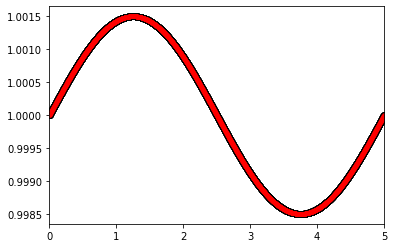

In [521]:
plt.plot(t,f,'ko')
plt.plot(t,np.median(f)+signal,'r.')
plt.xlim(0,5)

In [522]:
print(mag_to_flux(0,5))

100.0
100.0


In [523]:
#Lomb-Scargle
def LS(t,f,minT,maxT):
    from astropy.timeseries import LombScargle
    min_freq=1/maxT
    max_freq=1/minT

    model=LombScargle(t,f)
    freq,power=model.autopower(method='fast', normalization='psd',minimum_frequency=min_freq, maximum_frequency=max_freq) #power-spectral distribution
    period=1/freq
    return period,power

    

In [524]:
period,power=LS(t,f,1,10)

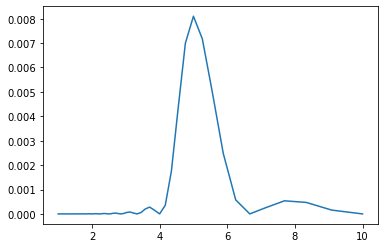

In [525]:
plt.plot(period,power)